# check on degree distribution

In [1]:
# run this only once!!
import os
os. chdir("../..")
os.getcwd()

'/Users/tonpoppe/workspace/graphcase_experiments/graphcase_experiments'

In [2]:
import networkx as nx
from graphcase_experiments.algos.GraphCaseWrapper import GraphCaseWrapper
from graphcase_experiments.tools.embedding_plotter import plot_embedding2, plotly_embedding, plot_graph
from graphcase_experiments.tools.calculate_embed import calculate_graphcase_embedding
import matplotlib.pyplot as plt
import pydot

/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# load graph
SOURCE_PATH = 'graphcase_experiments/graphs/enron/data/'
G = nx.read_gpickle(SOURCE_PATH + 'enron_sub_graph.pickle')

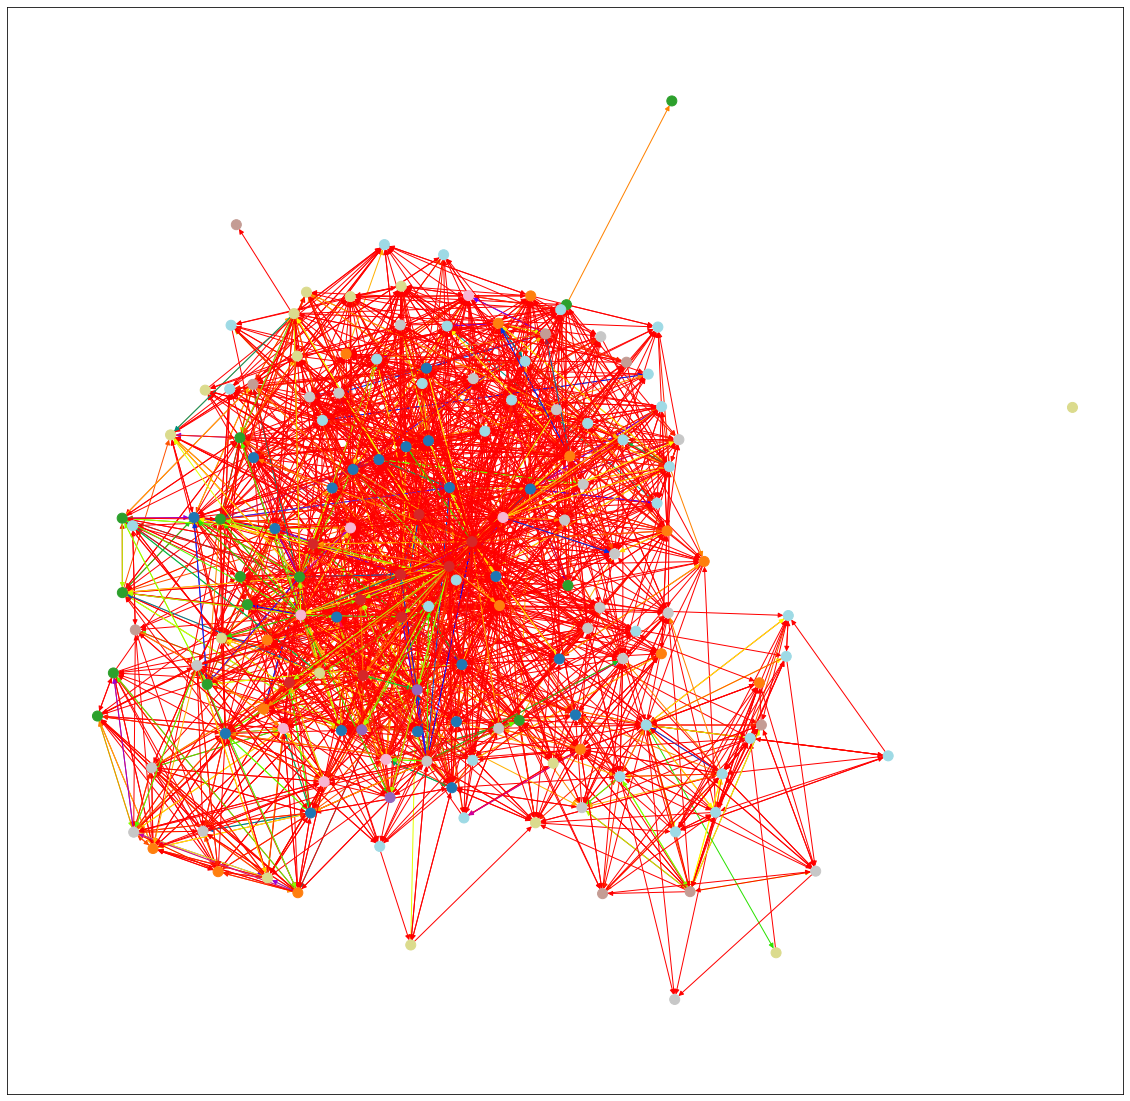

In [4]:
plot_graph(G)

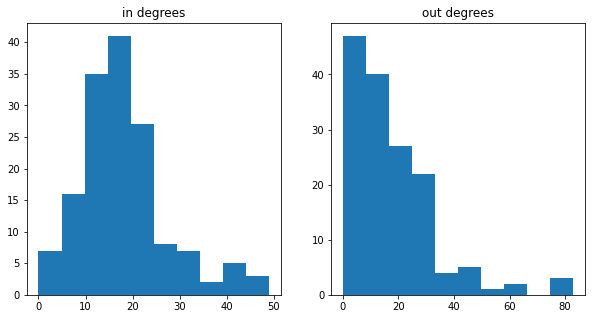

In [5]:
import matplotlib.pyplot as plt
indegrees = [d for n,d in G.in_degree()]
outdegrees = [d for n,d in G.out_degree()]

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(1, 2, 1)
ax.hist(indegrees, bins=10)
ax.set_title("in degrees")

ax = fig.add_subplot(1, 2, 2)
ax.hist(outdegrees, bins=10)
ax.set_title("out degrees")
plt.show()

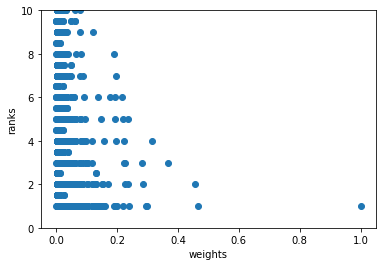

In [6]:
import numpy as np
import pandas as pd
import scipy.stats as ss
weights = []
ranks = []
ids = []
for n in G.nodes():
    nw_weight = [w for s,t,w in G.edges(n, data='weight')]
    weights = weights + nw_weight
    ranks = ranks + ss.rankdata(-np.array(nw_weight)).tolist()
    ids = ids + [n]*len(nw_weight)

plt.Figure()
plt.scatter(weights, ranks)
plt.xlabel("weights")
plt.ylim((0,10))
plt.ylabel("ranks")
plt.show()

## test for support size

In [4]:
from graphcase_experiments.experiments.ring_exp import decode_name, proces_graph
from graphcase_experiments.algos.GraphCaseWrapper import GraphCaseWrapper

algo = GraphCaseWrapper
params=GraphCaseWrapper.ENRON_PARAMS
params

{'batch_size': 30,
 'hub0_feature_with_neighb_dim': 128,
 'verbose': False,
 'seed': 1,
 'encoder_labels': ['attr1', 'attr2'],
 'learning_rate': 0.0003668872396300966,
 'act': <function tensorflow.python.ops.math_ops.sigmoid(x, name=None)>,
 'useBN': True,
 'dropout': 0.09859650451427784,
 'support_size': [7, 7],
 'dims': [3, 128, 128, 128],
 'epochs': 200}

In [5]:
from graphcase_experiments.experiments.enron_comp import calc_enron_performance
algo.ENRON_PARAMS['support_size'] = [7, 7]

res_df, smry_df = calc_enron_performance(G=G, algos=[algo], test_size=0.5, runs=5)

2022-07-02 13:52:15.291672: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-07-02 13:53:21.183908: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated clas

In [6]:
smry_df

ami            f1_macro            f1_micro         
               mean       std      mean       std      mean      std
algo                                                                
GraphCASE  0.072036  0.023413  0.146636  0.012067  0.239474  0.02531

In [7]:
algo.ENRON_PARAMS['support_size'] = [5, 5]

res_df, smry_df = calc_enron_performance(G=G, algos=[algo], test_size=0.5, runs=5)
smry_df

/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.wa

ami            f1_macro            f1_micro          
               mean       std      mean       std      mean       std
algo                                                                 
GraphCASE  0.058436  0.026715  0.150999  0.046559  0.268421  0.019955

In [8]:
algo.ENRON_PARAMS['support_size'] = [10, 10]

res_df, smry_df = calc_enron_performance(G=G, algos=[algo], test_size=0.5, runs=5)
smry_df

/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_split.

ami            f1_macro            f1_micro          
              mean       std      mean       std      mean       std
algo                                                                
GraphCASE  0.08289  0.016671  0.162444  0.033334  0.247368  0.028526

In [9]:
algo.ENRON_PARAMS['support_size'] = [15, 15]

res_df, smry_df = calc_enron_performance(G=G, algos=[algo], test_size=0.5, runs=5)
smry_df

/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_split.

ami            f1_macro            f1_micro         
               mean       std      mean       std      mean      std
algo                                                                
GraphCASE  0.096089  0.010376  0.181657  0.054653  0.286842  0.03991

## baseline

In [6]:
from graphcase_experiments.algos.baselineWrapper import BaselineWrapper
from graphcase_experiments.experiments.enron_comp import calc_enron_performance

algo = BaselineWrapper

res_df, smry_df = calc_enron_performance(G=G, algos=[algo], test_size=0.5, runs=5)
smry_df


2022-07-04 08:52:06.217774: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_spli

ami            f1_macro            f1_micro          
              mean       std      mean       std      mean       std
algo                                                                
baseline  0.052636  0.004826  0.124253  0.031978  0.263158  0.040555

In [11]:
# load graph
SOURCE_PATH = 'graphcase_experiments/graphs/enron/data/'
G_big = nx.read_gpickle(SOURCE_PATH + 'enron_graph.pickle')

In [12]:
params=algo.COMP_PARAMS
params['epochs'] = 20
params['dims'] = [3, 32,32,32]
params

{'batch_size': 30,
 'hub0_feature_with_neighb_dim': 128,
 'verbose': False,
 'seed': 1,
 'encoder_labels': ['attr1', 'attr2'],
 'learning_rate': 0.0003668872396300966,
 'act': <function tensorflow.python.ops.math_ops.sigmoid(x, name=None)>,
 'useBN': True,
 'dropout': 0.09859650451427784,
 'support_size': [7, 7],
 'dims': [3, 32, 32, 32],
 'epochs': 20}

In [13]:
from graphcase_experiments.tools.embedding_plotter import plot_embedding2, plotly_embedding, plot_graph
from graphcase_experiments.tools.calculate_embed import calculate_graphcase_embedding

algo = GraphCaseWrapper
_, tbl_gc = calculate_graphcase_embedding(
    G_big, algo.LOCATION, params=params, verbose=False, algo=algo
)


processed  100  batches time:  2022-07-04 14:32:44.972262
processed  200  batches time:  2022-07-04 14:32:46.490956
processed  300  batches time:  2022-07-04 14:32:48.181884
processed  400  batches time:  2022-07-04 14:32:50.116114
processed  500  batches time:  2022-07-04 14:32:52.375401
processed  600  batches time:  2022-07-04 14:32:54.876605
processed  700  batches time:  2022-07-04 14:32:57.539965
processed  800  batches time:  2022-07-04 14:33:00.479111
processed  900  batches time:  2022-07-04 14:33:03.696246
processed  1000  batches time:  2022-07-04 14:33:07.116524
processed  1100  batches time:  2022-07-04 14:33:10.697641
processed  1200  batches time:  2022-07-04 14:33:14.576805
processed  1300  batches time:  2022-07-04 14:33:18.589135
processed  1400  batches time:  2022-07-04 14:33:22.916374
processed  1500  batches time:  2022-07-04 14:33:27.510032
processed  1600  batches time:  2022-07-04 14:33:32.353058
processed  1700  batches time:  2022-07-04 14:33:37.387189
proces

In [18]:
tbl_small = tbl_gc[tbl_gc['label']!='no_label']
plotly_embedding(tbl_small)

/Users/tonpoppe/workspace/graphcase_experiments/graphcase_experiments/graphcase_experiments/tools/embedding_plotter.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  embed_df['embed1'] = embed[:,0]
/Users/tonpoppe/workspace/graphcase_experiments/graphcase_experiments/graphcase_experiments/tools/embedding_plotter.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  embed_df['embed2'] = embed[:,1]


In [22]:
main_label = {
    'ceos-president': 'senior_mngt',
    'managing director': 'senior_mngt',
    'executive vp': 'senior_mngt',
    'vice president': 'senior_mngt',
    'director': 'middle_mngt',
    'manager': 'middle_mngt',
    'trader': 'trader',
    'specialist': 'employee',
    'employee': 'employee',
    'attorney-legal asst.': 'employee',
}


In [26]:
tbl_small2 = tbl_small.copy()
tbl_small2['label'] = tbl_small2['label'].map(lambda a: main_label[a])
tbl_small2.head(4)
plotly_embedding(tbl_small2)

/Users/tonpoppe/workspace/graphcase_experiments/graphcase_experiments/graphcase_experiments/tools/embedding_plotter.py:88: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/tonpoppe/workspace/graphcase_experiments/graphcase_experiments/graphcase_experiments/tools/embedding_plotter.py:89: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
from graphcase_experiments.experiments.ring_exp import classify_svm
classify_svm(tbl_small, seed=4, test_size=0.5)

/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=3.

/Users/tonpoppe/workspace/graphcase_experiments/graphcase_experiments/graphcase_experiments/experiments/ring_exp.py:131: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'f1_macro': 0.12980720092915216,
 'f1_micro': 0.21052631578947367,
 'pred_labels': 5260     1
 7112     2
 7140     2
 7983     1
 8025     3
         ..
 84859    5
 85243    5
 85761    4
 86205    2
 86280    2
 Name: pred_label, Length: 151, dtype: int64}

## Gridsearch

In [9]:

from graphcase_experiments.tools.gridsearch import grid_search_graphcase
PATH = 'graphcase_experiments/data/enron/'
node_attributes = [a for a in G.nodes[0].keys() if a.startswith("attr")]
def search_params(trial):
    return {
        'learning_rate': trial.suggest_float("learning_rate", 1e-6, 1e-2, log=True),
        'act': trial.suggest_categorical("act", ['relu', 'sigmoid', 'identity']),
        'useBN': trial.suggest_categorical("useBN", [True]),
        'dropout': trial.suggest_float("dropout", 0.0, 0.3),
        'support_size': trial.suggest_int("support_size", 2, 8),
        'dims': trial.suggest_categorical("dims", [64, 128]),
    }
FIXED_PARAMS = {
        'batch_size': 30,
        'hub0_feature_with_neighb_dim': 128,
        'verbose': False,
        'seed': 1,
        'encoder_labels': node_attributes,
        'epochs': 200,
        'trials': 200
    }
_, params = grid_search_graphcase(G2, PATH, [search_params, FIXED_PARAMS])

AssertionError: The follwing encoders labels could not be found ['attr1', 'attr2']